<a href="https://colab.research.google.com/github/rcarasek/Python-for-Investment/blob/main/PyForInvest_Colab_aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas
# ver
# https://towardsdatascience.com/options-trading-technical-analysis-using-python-f403ec2985b4


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override() 


Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.59)


# obtendo os dados do Y finance

In [3]:
ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


In [5]:
ibov.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.4,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.6,23.700001,24.299999,24.299999,0


In [6]:
ibov.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-29,121053.0,121498.0,119703.0,120066.0,120066.0,8500200
2021-04-30,120064.0,120125.0,118894.0,118894.0,118894.0,11093200


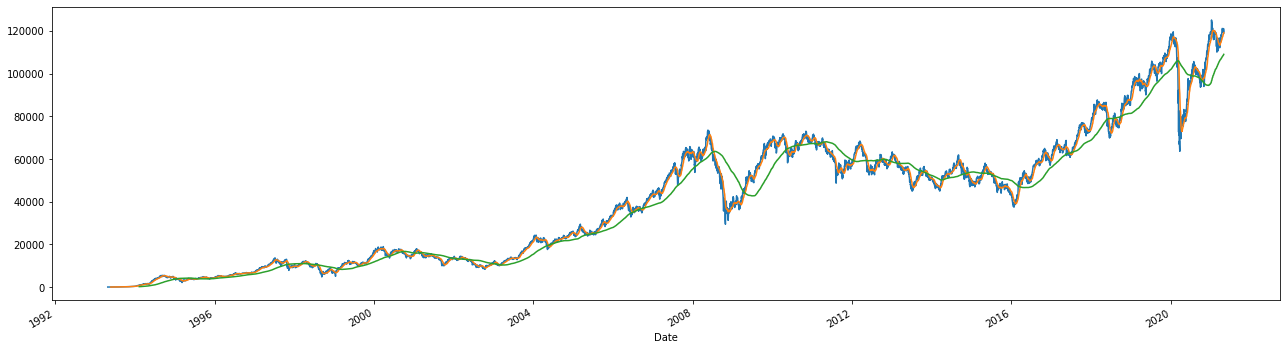

In [7]:
ibov['Close'].plot(figsize=(22,6), label= "IBOVESPA")
ibov['Close'].rolling(21).mean().plot(label="MM21")
ibov['Close'].rolling(200).mean().plot(label="MM200")


In [ ]:
ibov_porMes = ibov[ibov.index.month == 12]
ibov_porMes.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-22,115825.0,116903.0,115648.0,116348.0,116348.0,6947900
2020-12-23,116636.0,118311.0,116636.0,117857.0,117857.0,6483300
2020-12-28,117806.0,119213.0,117805.0,119051.0,119051.0,7171700
2020-12-29,119130.0,119861.0,118750.0,119475.0,119475.0,6769700
2020-12-30,119410.0,120150.0,118919.0,119306.0,119306.0,8235700


In [ ]:
ibov2020_2021 = web.get_data_yahoo('^BVSP', start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov2020_2021

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2021-04-26,120534.0,121393.0,119860.0,120595.0,120595.0,7095300
2021-04-27,120595.0,121012.0,119003.0,119388.0,119388.0,8362300
2021-04-28,119392.0,121276.0,119392.0,121053.0,121053.0,9081500


In [8]:
vale3_2020_emDiante = web.get_data_yahoo('VALE3.SA', start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
vale3_2020_emDiante.head(2)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,53.98,54.439999,53.750000,54.330002,49.901928,17509700
2020-01-03,53.68,54.500000,53.580002,53.930000,49.534527,17284800


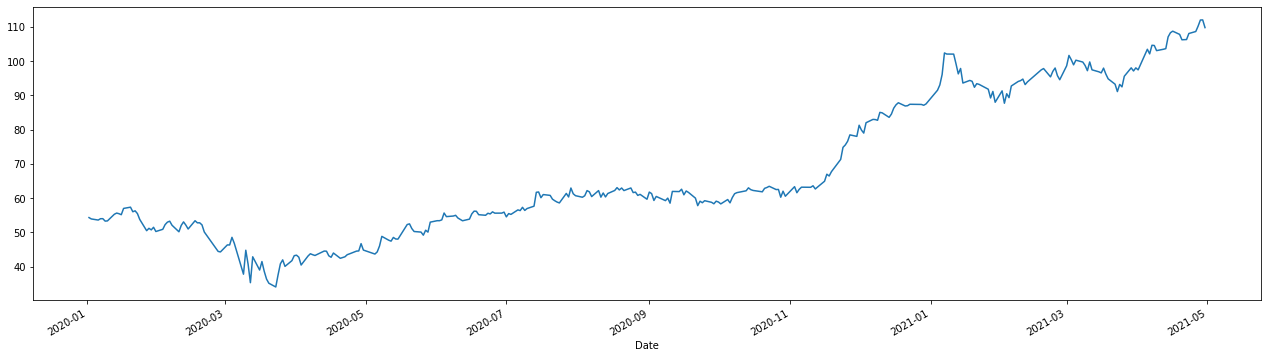

In [ ]:
vale3_2020_emDiante['Close'].plot(figsize=(22,6), label= "VALE3")

In [18]:
tickers = ["^BVSP", "USDBRL=X"]
carteira = web.get_data_yahoo(tickers, start = "2008-01-01")["Close"]
carteira
carteira = carteira.dropna()
carteira

[*********************100%***********************]  2 of 2 completed


,USDBRL=X,^BVSP
Date,,
2008-01-02,1.7645,62815.0
2008-01-03,1.7480,62892.0
2008-01-04,1.7572,61037.0
2008-01-07,1.7640,60772.0
2008-01-08,1.7520,62081.0
...,...,...
2021-04-26,5.4772,120595.0
2021-04-27,5.4353,119388.0
2021-04-28,5.4510,121053.0


In [20]:
carteira.columns = ["dolar", "ibov"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b69ba1690>,
      dtype=object)

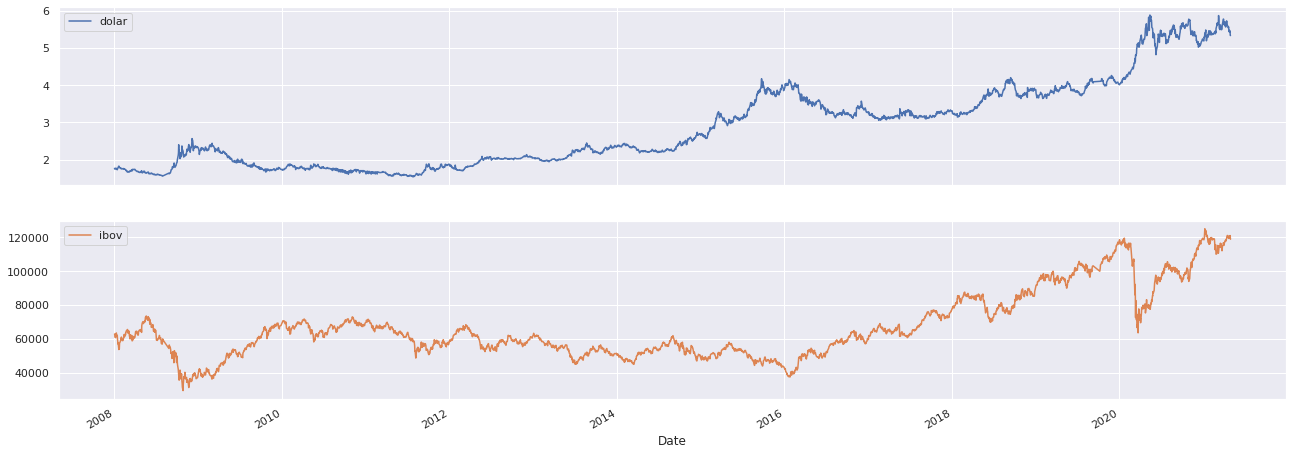

In [23]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

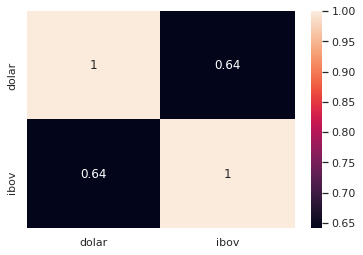

In [26]:
sns.heatmap(carteira.corr(), annot=True)

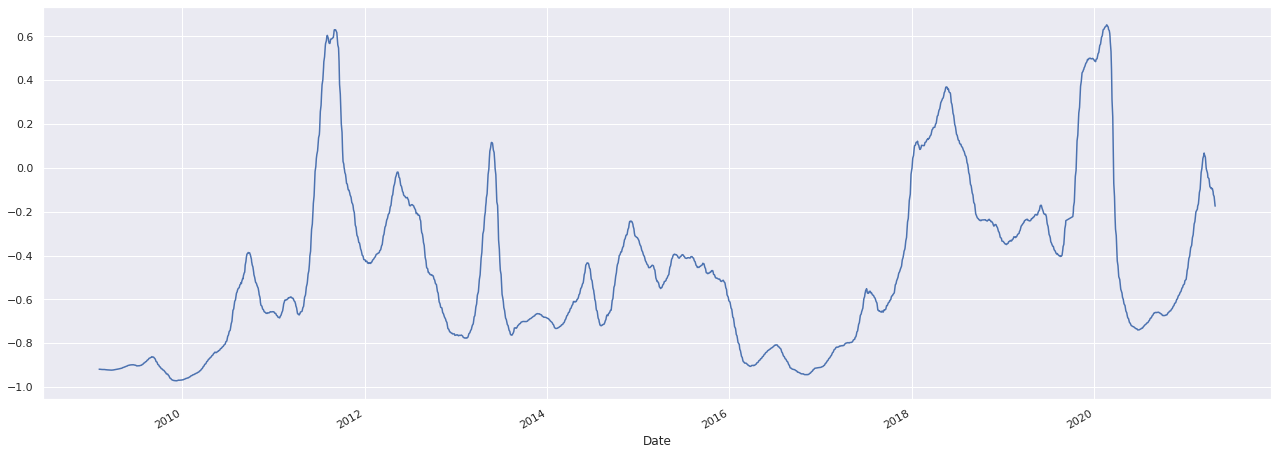

In [31]:
carteira["dolar"].rolling(252).corr(carteira["ibov"]).plot(figsize=(22,8))

In [33]:
carteira["ibov_dolarizado"] = (carteira["ibov"] / carteira["dolar"])
carteira

,dolar,ibov,ibov_dolarizado
Date,,,
2008-01-02,1.7645,62815.0,35599.319478
2008-01-03,1.7480,62892.0,35979.404504
2008-01-04,1.7572,61037.0,34735.374407
2008-01-07,1.7640,60772.0,34451.246029
2008-01-08,1.7520,62081.0,35434.361251
...,...,...,...
2021-04-26,5.4772,120595.0,22017.636623
2021-04-27,5.4353,119388.0,21965.301415
2021-04-28,5.4510,121053.0,22207.483995
